<table align="center"> 
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/jemutaic/TapiaConference/blob/main/IntroDeepLearningTapiaConference.ipynb">
          <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table> 

#Tapia Conference: Introduction to deep learning

In [ ]:
import tensorflow as tf 

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#What is a neural network? 


Neural networks are computing systems where computing systems learn underlying patterns in data by analyzing training samples. 



There are many types of deep learning networks but for today we will be specifically working with Convolutional Neural Networks (CNN's) 






![alt_text](https://raw.githubusercontent.com/jemutaic/TapiaConference/master/.github/images/SimpleNeuralNetwork.png "Simple Neural Network")

Neural networks are organized in layers. What differentiates different types of networks are the layers, how they're connected and what happens in the layers. 

* *Input Layers* accept the inputs
* *Hidden Layers* process all the inputs 
* *Output Layers* process the outputs. 


Each unit (or the circles shown above ) is called a neuron and is modelled after neurons in the brain. 


## Our Process Today 
* Data and Data Processing 
* Model Selection 
* Architecting Model 
* Training 
* Testing and Evaluation 

## MNIST Dataset 
The MNIST dataset is a large database of handwritten digits commonly used for training image processing systems.

Let's load and explore the data. 


In [ ]:
(train_images, train_labels), (test_images,test_labels) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
train_images, test_images = train_images[..., np.newaxis]/255.0, test_images[..., np.newaxis]/255.0

In [ ]:
# train_images[0].shape
# train_images[0]

Let's plot a bunch of images and actually see what we're working with

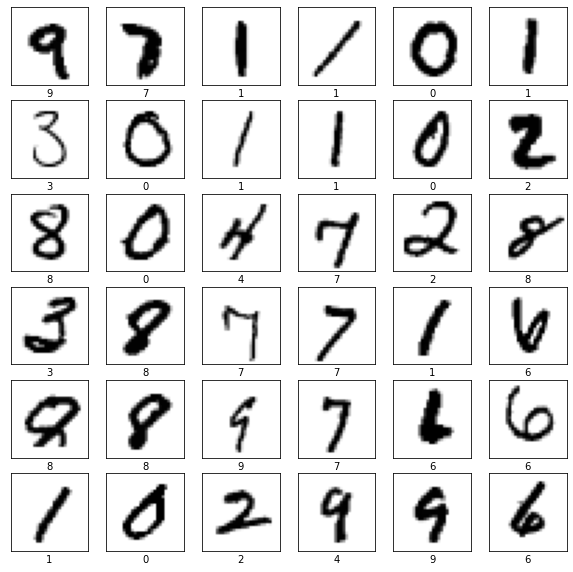

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

##Convolutional Neural Networks

Convolutional neural networks work by *convolving* a *kernel/filter* around an image. 

In the example below, suppose we have an image in  source/input layer - what happens is we run the  kernel through the image - essentially performing dot product around the image to get a whole new image with extracted features :) 

![alt_text](https://raw.githubusercontent.com/jemutaic/TapiaConference/master/.github/images/ConvolutionExample.jpg "CNN Architecture for MNIST Classification")


Filters are very instrumental in extracting information about an image - let's look at another example. In the example below; we have two filters, f1 and f2 to identify vertical and horizontal black lines respectively. 


![alt_text](https://raw.githubusercontent.com/jemutaic/TapiaConference/master/.github/images/Filter.png "Filter Example")


## Let's CODE! 

To define the architecture of our CNN, we'll use the Keras API and define the model using the [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential) class. 

Before delving in there are some key terms that we need to understand as we construct the network: 

* *Loss function* — The loss function gives us insights of understanding how well our model is performing. During training, we want to minimize loss - iteratively. 


* *Optimizer* — An optimizer is a mathematical step that defines how the loss will be optimized. For the purposes of this class, you can say "we use the optimizer to optimize the loss function" 


* *Metrics* — There are many ways of monitoring how well your model is performing. For today, we'll look at the *accuracy*, the fraction of the images that are correctly classified.

* *activation* — The activation function defines the output of a neuron / node given an input or set of input (output of multiple neurons). They help us introduce non-linearity into the network when modeling different functions


Side note- 
As an excercise, you'll want to experiment with both the choice of optimizer and learning rate and evaluate how these affect the accuracy of your trained model. 



For today, we'll work with a simple neural network 

In [ ]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
cnn_model.predict(train_images[[0]])
print(cnn_model.summary())

Let's compile the model by including the optimizer, learning rate and defining the loss function

In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Then let's fit the model with our train and test data

In [ ]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

## Industry Applications and Ethical Concerns

Popular uses of deep learning 
* Facial Recognition systems - your iphone unlocks your screen using deep learning, Facebook Identifies faces for tagging using deep learning
* Detecting and diagnosing diseases 
* Self driving cars

###Ethical Concerns 
* What data is used to train deep learning? 
* How is bias introduced and how can it be mitigated?

https://www.youtube.com/watch?v=QxuyfWoVV98

Now that you have a basic idea of how convolutional neural networks work, what do you think affects their performance? 

Off the top of your head, what concerns do you think it raises in Industry?